# `Exploratory data Analysis on Churn Modelling`

### Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

In [5]:
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
data.shape

(10000, 12)

In [7]:
data.isnull().sum()   # no null values

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## `Variables`
### Categorical:
> - Geography 
> - Gender
> - HasCrCard
> - IsActiveMember
> - Exited
> - Tenure
> - No Of Products


### Numerical:
> - CreditScore
> - Age 
> - Balance
> - EstimatedSalary


---

## `Univariate Analysis`

---

### `Catagorical`
> - Geography 
> - Gender
> - HasCrCard
> - IsActiveMember
> - Exited
> - Tenure
> - No Of Products

### Geography

In [8]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

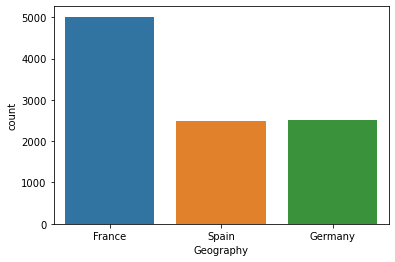

In [9]:
sns.countplot(data['Geography'])

#### `France has maximum customers`

### Gender

In [10]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

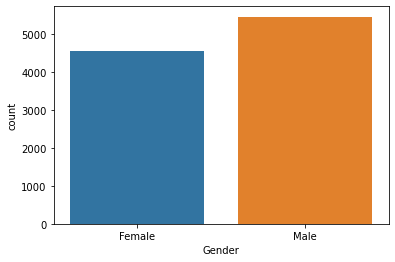

In [11]:
sns.countplot(data['Gender'])

#### `Maximum customers are of Gender Male`

### Has Credit Card

In [12]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

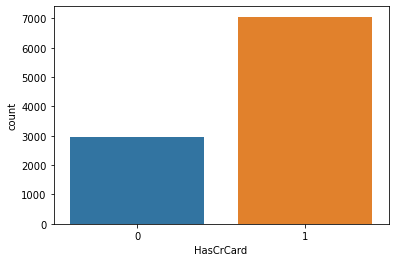

In [13]:
sns.countplot(data['HasCrCard'])

#### `Max customers have credit card`

### IsActiveMember

In [14]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

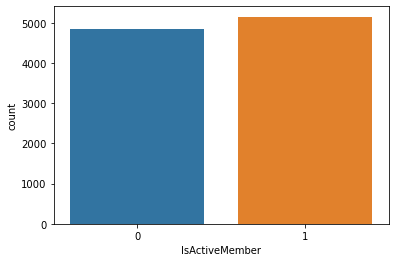

In [15]:
sns.countplot(data['IsActiveMember'])

#### `Maximum customers are active customers`

### Exited

In [16]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

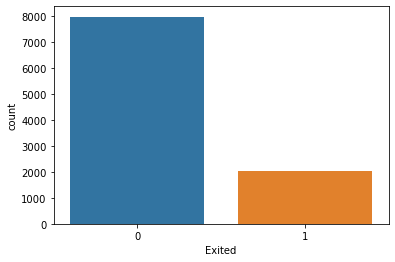

In [17]:
sns.countplot(data['Exited'])

#### `Maximum customers are not going to churn`

### Tenure

In [18]:
data['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

Text(0, 0.5, 'Number of Customers')

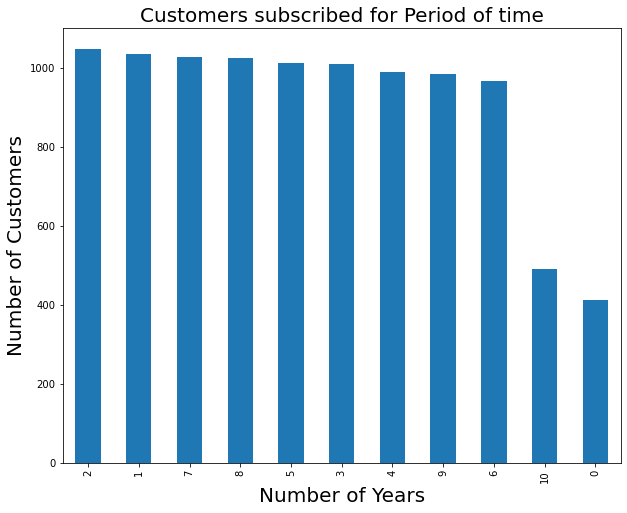

In [19]:
plt.figure(figsize=(10,8))
data['Tenure'].value_counts().sort_values(ascending=False).plot.bar()
plt.title('Customers subscribed for Period of time',fontsize=20)
plt.xlabel('Number of Years',fontsize=20)
plt.ylabel('Number of Customers',fontsize=20)

#### `These customers had subscribed for a good amount of time`

### No of Products

Text(0.5, 1.0, 'Customers subscribed for Products')

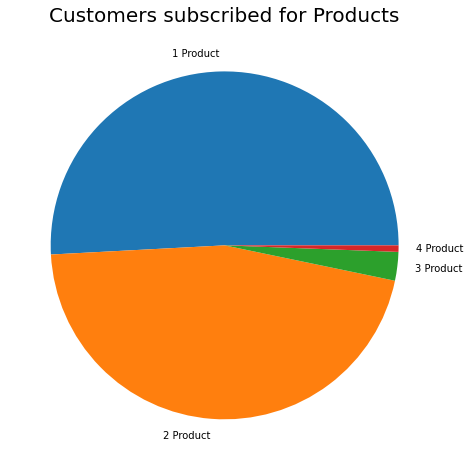

In [20]:
plt.figure(figsize=(10,8))
plt.pie(data['NumOfProducts'].value_counts(),labels=['1 Product','2 Product','3 Product','4 Product']);
plt.title('Customers subscribed for Products',fontsize=20)

In [21]:
print(f'{5084/100}% Customers subscribed for 1 product')
print(f'{4590/100}% Customers subscribed for 2 products')
print(f'{266/100}% Customers subscribed for 3 products')
print(f'{60/100}% Customers subscribed for 4 products')

50.84% Customers subscribed for 1 product
45.9% Customers subscribed for 2 products
2.66% Customers subscribed for 3 products
0.6% Customers subscribed for 4 products


### `Numerical`
> - CreditScore
> - Age 
> - Balance
> - EstimatedSalary

### CreditScore

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

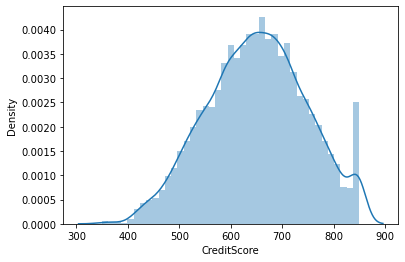

In [22]:
sns.distplot(data['CreditScore'])

<AxesSubplot:xlabel='CreditScore'>

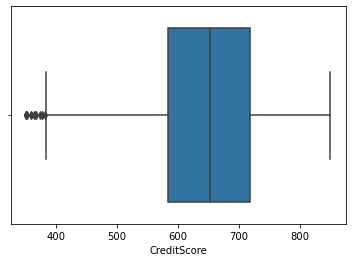

In [23]:
sns.boxplot(data['CreditScore'])

In [24]:
data['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [25]:
q1=np.percentile(data['CreditScore'],25)
q3=np.percentile(data['CreditScore'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound:{lower_bound} and Upper Bound:{upper_bound}')

Lower Bound:383.0 and Upper Bound:919.0


In [26]:
# CODE HERE
data = data[data['CreditScore'] > lower_bound]   # remove outliers
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#### `Population has a mean CreditScore of 650`

### Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

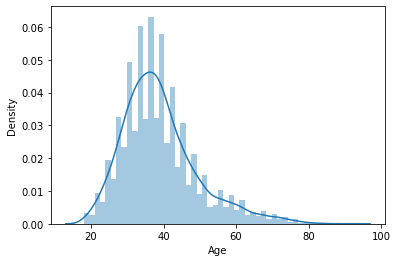

In [27]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Age'>

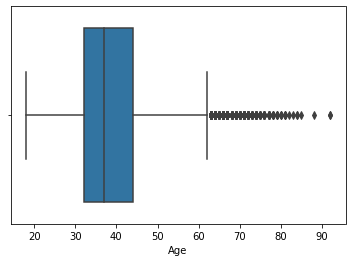

In [28]:
sns.boxplot(data['Age'])

In [29]:
data['Age'].describe()

count    9984.000000
mean       38.914263
std        10.487614
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

#### `finding quartiles to detect outliers`

In [30]:
q1=np.percentile(data['Age'],25)
q3=np.percentile(data['Age'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value

In [31]:
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

Lower Bound: 14.0
Upper Bound: 62.0


#### `remove outliers ` 

In [32]:
# data.loc[data.Age > upper_bound, 'Age'] = upper_bound    

In [33]:
# data[data['Age'] > upper_bound]['Age']

In [34]:
# CODE HERE
data = data[data['Age'] <  upper_bound]   # remove outliers
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<AxesSubplot:xlabel='Age'>

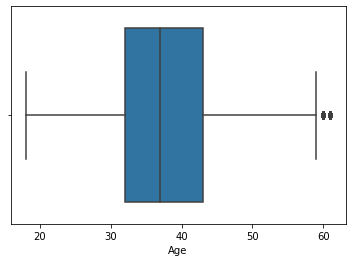

In [35]:
sns.boxplot(data['Age'])

### Balance

<AxesSubplot:xlabel='Balance', ylabel='Density'>

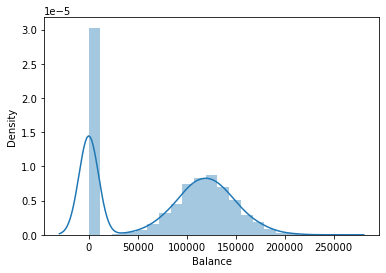

In [36]:
sns.distplot(data['Balance'])

<AxesSubplot:xlabel='Balance'>

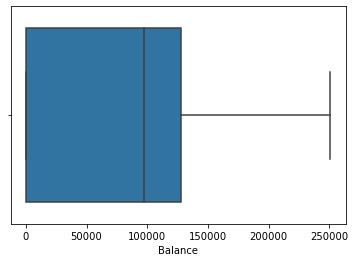

In [37]:
sns.boxplot(data['Balance'])

In [38]:
data['Balance'].describe()

count      9573.000000
mean      76535.269043
std       62422.667025
min           0.000000
25%           0.000000
50%       97257.410000
75%      127655.220000
max      250898.090000
Name: Balance, dtype: float64

#### `Zero Bank Balance`

In [39]:
data[data['Balance'] == 0].shape

(3461, 12)

In [40]:
data['Balance'].shape

(9573,)

In [41]:
total_percentage_of_customers_having_zero_balance=3617/100
print(f'{total_percentage_of_customers_having_zero_balance}%')

36.17%


#### `36.17% customers do not have any money in there bank balance`

### Estimated Salary

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

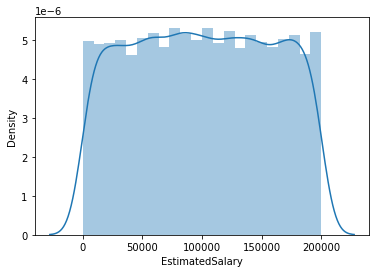

In [42]:
sns.distplot(data['EstimatedSalary'])

<AxesSubplot:xlabel='EstimatedSalary'>

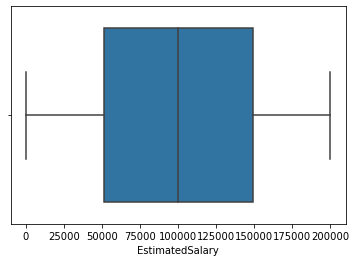

In [43]:
sns.boxplot(data['EstimatedSalary'])

In [44]:
data['EstimatedSalary'].describe()

count      9573.000000
mean     100137.024645
std       57512.047240
min          11.580000
25%       51112.800000
50%      100187.430000
75%      149418.410000
max      199992.480000
Name: EstimatedSalary, dtype: float64

#### `Uniformly Distributed Estimated Salary`

------

----------

## `Bivariate Analysis between all columns, useful for Feature Engineering and Feature Selection`

-----------

### `Hypothesis testing On Churn Modeling Dataset`

### `Cat vs Cat : Chi-Square Test`

###  Geography vs Gender

In [45]:
two_way_frquency=pd.crosstab(data['Geography'],data['Gender'])
two_way_frquency

Gender,Female,Male
Geography,,
France,2156,2646
Germany,1147,1260
Spain,1041,1323


In [46]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [47]:
p_value   # p-value < 0.05 --- accept alternate hypothesis

0.027461481825621106

#### `Geography and Gender are related`

###  HasCrCard vs Gender

In [48]:
two_way_frquency=pd.crosstab(data['HasCrCard'],data['Gender'])
two_way_frquency

Gender,Female,Male
HasCrCard,,
0,1291,1527
1,3053,3702


In [49]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [50]:
p_value  # p_value > 0.05 -------- accept null hypothesis

0.5963553825549729

#### `HasCrCard and Gender are not related`

###  IsActiveMember vs Gender

In [51]:
two_way_frquency=pd.crosstab(data['IsActiveMember'],data['Gender'])
two_way_frquency

Gender,Female,Male
IsActiveMember,,
0,2212,2550
1,2132,2679


In [52]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [53]:
p_value # p-value < .05 ---- accept alternate hypothesis

0.037682576162831875

#### `Gender and IsActive Member are not related`

###  Geography vs Exited

In [54]:
two_way_frquency=pd.crosstab(data['Geography'],data['Exited'])
two_way_frquency

Exited,0,1
Geography,,
France,4033,769
Germany,1635,772
Spain,1978,386


In [55]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [56]:
p_value # p-value < .05 ---- accept alternate hypothesis

1.0652251938333508e-62

#### `Geography and Exited are related`

---

### `Num vs Num : Correlation Test`

###  Age vs CreditScore

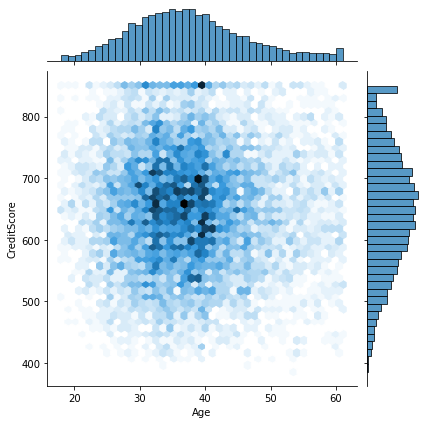

In [57]:
sns.jointplot('Age','CreditScore',data=data,kind='hex')

In [58]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['Age'],data['CreditScore'])

In [59]:
correlation    # weak or no association

-0.012952755953813217

In [60]:
p_value    # accept null hypothesis 

0.2050811259554618

#### `Age and CreditScore are not related`

###  Age vs Balance

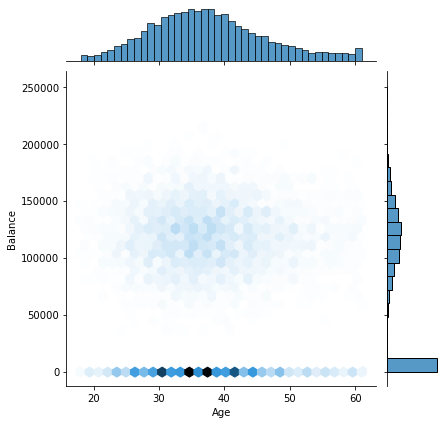

In [61]:
sns.jointplot('Age','Balance',data=data,kind='hex')

In [62]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['Age'],data['Balance'])

In [63]:
p_value   # reject null hypothesis

3.994261460666832e-05

In [64]:
correlation   # weak association

0.04197123727956334

#### `Age and Balance are related -----------**** Suspicious ****`

###  EsimatedSalary vs Balance

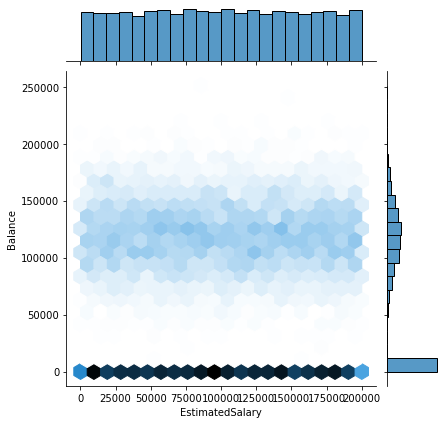

In [65]:
sns.jointplot('EstimatedSalary','Balance',data=data,kind='hex')

In [66]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['EstimatedSalary'],data['Balance'])

In [67]:
correlation   # weak association

0.010524249502772223

In [68]:
p_value    # accept null hypothesis

0.3031956531548595

#### `EstimatedSalary and Balance are not related`

###  CreditScore vs EstimatedSalary

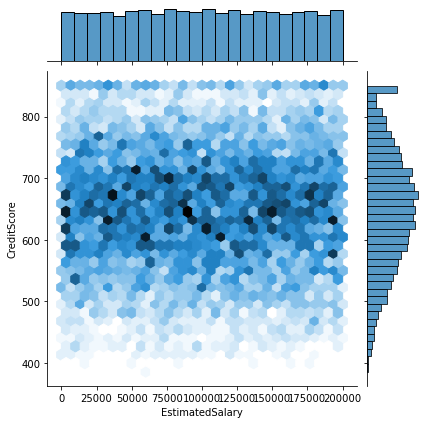

In [69]:
sns.jointplot('EstimatedSalary','CreditScore',data=data,kind='hex')

In [70]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['EstimatedSalary'],data['CreditScore'])

In [71]:
correlation

0.00202084096436293

In [72]:
p_value    # accept null hypothesis

0.8432822028302961

#### `EstimatedSalary and CreditScore are not related`

###  CreditScore Vs Balance

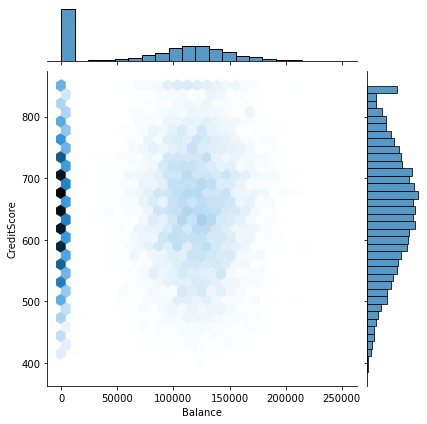

In [73]:
sns.jointplot('Balance','CreditScore',data=data,kind='hex')

In [74]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['Balance'],data['CreditScore'])

In [75]:
correlation

0.008359858329200356

In [76]:
p_value   # Accept null hypothesis

0.4134426694178408

#### `Balance and CreditScore are not related`

---

## `Variables`
### Categorical:
> - Geography 
> - Gender
> - HasCrCard
> - IsActiveMember
> - Exited
> - Tenure
> - No Of Products


### Numerical:
> - CreditScore
> - Age 
> - Balance
> - EstimatedSalary


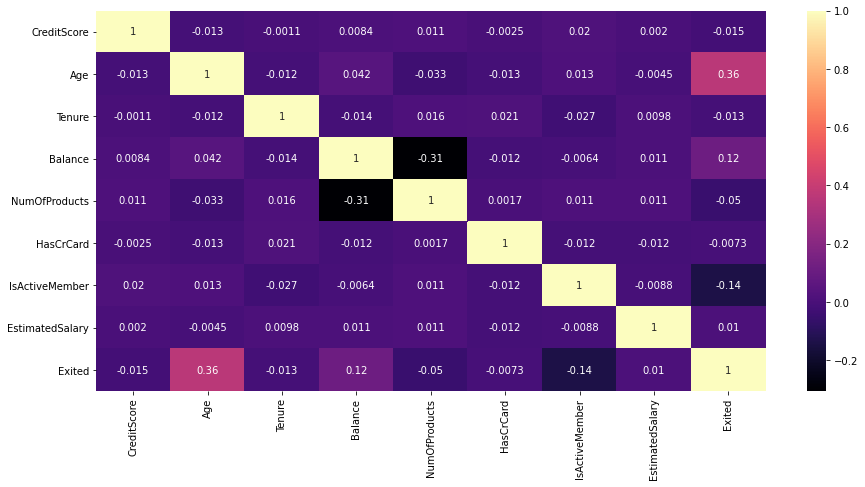

In [77]:
plt.figure(figsize=(15,7))
corr_mat = data.corr()

sns.heatmap(corr_mat,annot=True,cmap='magma')
plt.show()

## `Cat vs Num : T and Anova Test`

--------

## `EstimatedSalary`

### vs Gender 

In [78]:
grp_female = data.loc[data["Gender"]=='Female','EstimatedSalary']
grp_male = data.loc[data["Gender"]=='Male','EstimatedSalary']
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_female,grp_male)
ttest_results

Ttest_indResult(statistic=0.6579645605185958, pvalue=0.5105767284579243)

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

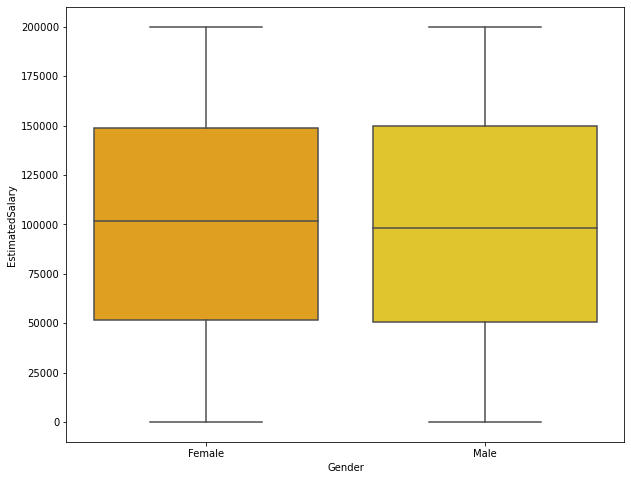

In [79]:
plt.figure(figsize=(10,8))
sns.boxplot(y='EstimatedSalary',x='Gender',data=data,palette='Wistia_r')

#### `EstimatedSalary and Balance are not related`

### vs HasCrCard

In [80]:
yes_CrCard = data.loc[data["HasCrCard"]==1,'EstimatedSalary']
no_CrCard = data.loc[data["HasCrCard"]==0,'EstimatedSalary']
from scipy.stats import ttest_ind
ttest_results = ttest_ind(yes_CrCard,no_CrCard)
ttest_results

Ttest_indResult(statistic=-1.1557031677987888, pvalue=0.24783144107392477)

<AxesSubplot:xlabel='HasCrCard', ylabel='EstimatedSalary'>

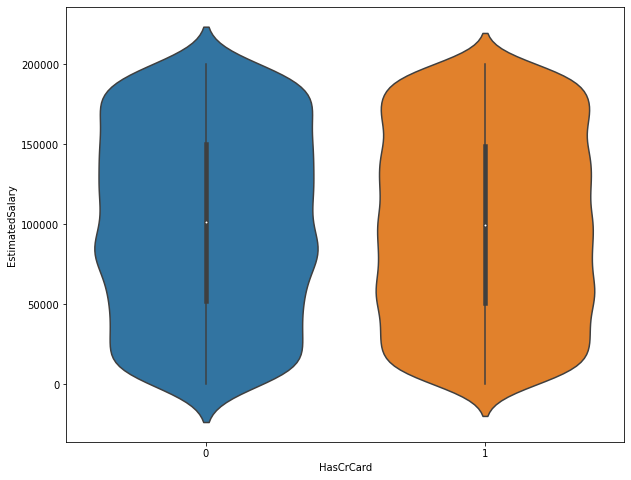

In [81]:
plt.figure(figsize=(10,8))
sns.violinplot(y='EstimatedSalary',x='HasCrCard',data=data)

#### `HasCrCard and EstimatedSalary are not related`

### vs IsActiveMember

In [82]:
yes_active = data.loc[data["IsActiveMember"]==1,'EstimatedSalary']
no_active = data.loc[data["IsActiveMember"]==0,'EstimatedSalary']
from scipy.stats import ttest_ind
ttest_results = ttest_ind(yes_active,no_active)
ttest_results

Ttest_indResult(statistic=-0.8636686320873718, pvalue=0.38779159257723383)

<AxesSubplot:xlabel='IsActiveMember', ylabel='EstimatedSalary'>

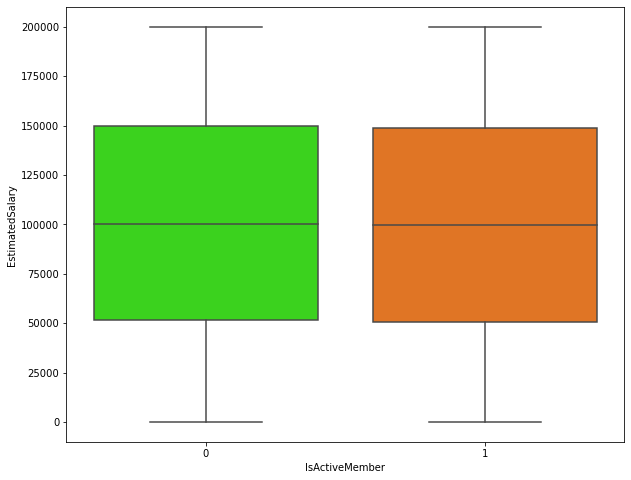

In [83]:
plt.figure(figsize=(10,8))
sns.boxplot(y='EstimatedSalary',x='IsActiveMember',data=data,palette='gist_ncar')

#### `IsActiveMember and EstimatedSalary are not related`

### vs Exited

In [84]:
yes_churn = data.loc[data["Exited"]==1,'EstimatedSalary']
no_churn = data.loc[data["Exited"]==0,'EstimatedSalary']
from scipy.stats import ttest_ind
ttest_results = ttest_ind(yes_churn,no_churn)
ttest_results

Ttest_indResult(statistic=0.9891707378122429, pvalue=0.3226046185199479)

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

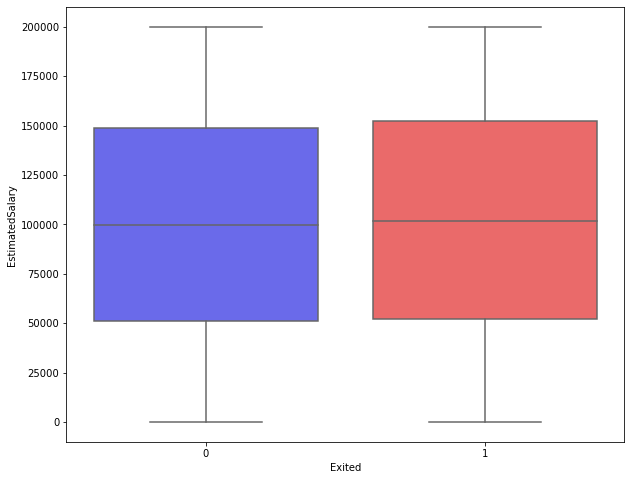

In [85]:
plt.figure(figsize=(10,8))
sns.boxplot(y='EstimatedSalary',x='Exited',data=data,palette='seismic')

#### `Exited and EstimatedSalary are not related`

### vs No Of Products

In [86]:
grp_1 = data.loc[data["NumOfProducts"]==1,'EstimatedSalary']
grp_2 = data.loc[data["NumOfProducts"]==2,'EstimatedSalary']
grp_3 = data.loc[data["NumOfProducts"]==3,'EstimatedSalary']
grp_4 = data.loc[data["NumOfProducts"]==4,'EstimatedSalary']
from scipy.stats import f_oneway

f_oneway(grp_1,grp_2,grp_3,grp_4)

F_onewayResult(statistic=0.6027147709895766, pvalue=0.6131808314711454)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

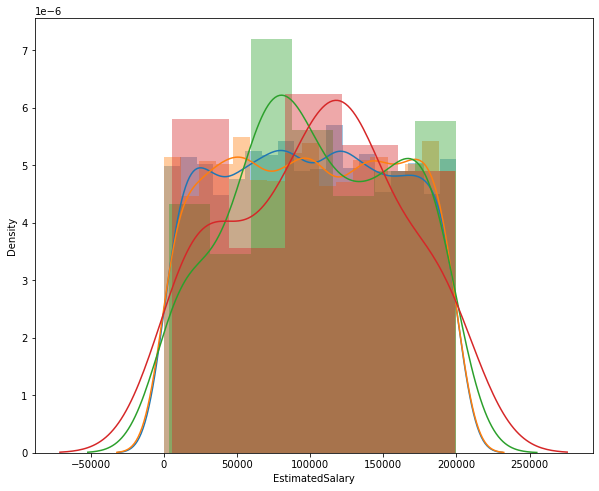

In [87]:
plt.figure(figsize=(10,8))
sns.distplot(grp_1)
sns.distplot(grp_2)
sns.distplot(grp_3)
sns.distplot(grp_4)

#### `No of Products and EstimatedSalary are not related`

### vs Geography 

In [88]:
grp_france = data.loc[data["Geography"]=='France','EstimatedSalary']
grp_germany = data.loc[data["Geography"]=='Germany','EstimatedSalary']
grp_spain = data.loc[data["Geography"]=='Spain','EstimatedSalary']
from scipy.stats import f_oneway

f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=0.8533070782343696, pvalue=0.42603618187571646)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

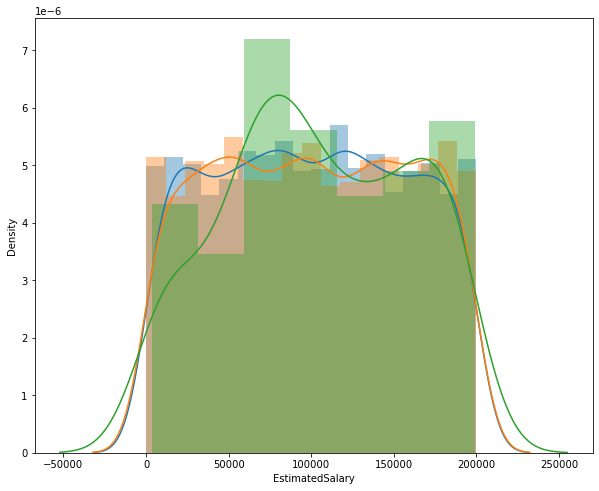

In [89]:
plt.figure(figsize=(10,8))
sns.distplot(grp_1)
sns.distplot(grp_2)
sns.distplot(grp_3)

#### ` Geography and EstimatedSalary are not related`

### vs Tenure

In [90]:
grp_0 = data.loc[data["Tenure"]==0,'EstimatedSalary']
grp_1 = data.loc[data["Tenure"]==1,'EstimatedSalary']
grp_2 = data.loc[data["Tenure"]==2,'EstimatedSalary']
grp_3 = data.loc[data["Tenure"]==3,'EstimatedSalary']
grp_4 = data.loc[data["Tenure"]==4,'EstimatedSalary']
grp_5 = data.loc[data["Tenure"]==5,'EstimatedSalary']
grp_6 = data.loc[data["Tenure"]==6,'EstimatedSalary']
grp_7 = data.loc[data["Tenure"]==7,'EstimatedSalary']
grp_8 = data.loc[data["Tenure"]==8,'EstimatedSalary']
grp_9 = data.loc[data["Tenure"]==9,'EstimatedSalary']
grp_10 = data.loc[data["Tenure"]==10,'EstimatedSalary']
grp_11 = data.loc[data["Tenure"]==11,'EstimatedSalary']
from scipy.stats import f_oneway

f_oneway(grp_0,grp_1,grp_2,grp_3,grp_4,grp_5,grp_6,grp_7,grp_8,grp_9,grp_10)

F_onewayResult(statistic=0.6270759314103403, pvalue=0.791975735529789)

<AxesSubplot:xlabel='Tenure', ylabel='EstimatedSalary'>

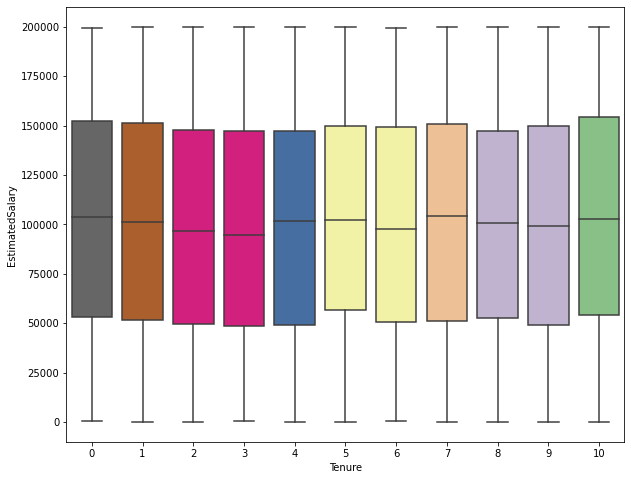

In [91]:
plt.figure(figsize=(10,8))
sns.boxplot(y='EstimatedSalary',x='Tenure',data=data,palette='Accent_r')

#### ` Tenure and EstimatedSalary are not related`

---

## `Balance`

---

### vs Gender

In [92]:
grp_female = data.loc[data["Gender"]=='Female','Balance']
grp_male = data.loc[data["Gender"]=='Male','Balance']
ttest_results = ttest_ind(grp_female,grp_male)
ttest_results

Ttest_indResult(statistic=-1.212042665892266, pvalue=0.22552596866448577)

<AxesSubplot:xlabel='Gender', ylabel='Balance'>

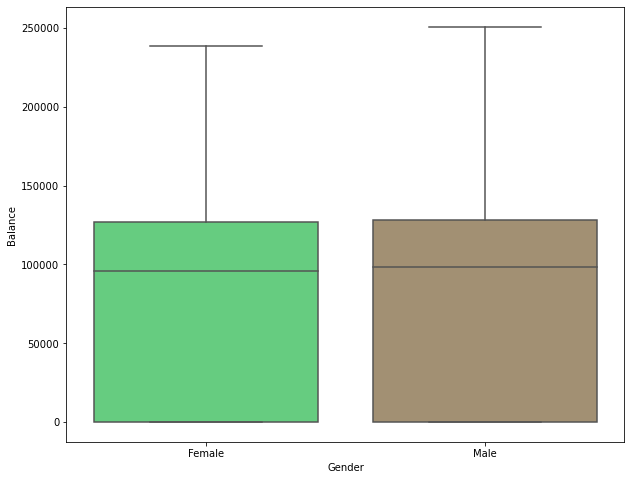

In [93]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Balance',x='Gender',data=data,palette='terrain')

#### `Balance and Gender are not related`

### vs HasCrCard

In [94]:
yes_CrCard = data.loc[data["HasCrCard"]==1,'Balance']
no_CrCard = data.loc[data["HasCrCard"]==0,'Balance']
ttest_results = ttest_ind(yes_CrCard,no_CrCard)
ttest_results

Ttest_indResult(statistic=-1.2041092873411852, pvalue=0.22857711795042765)

<AxesSubplot:xlabel='Balance', ylabel='Density'>

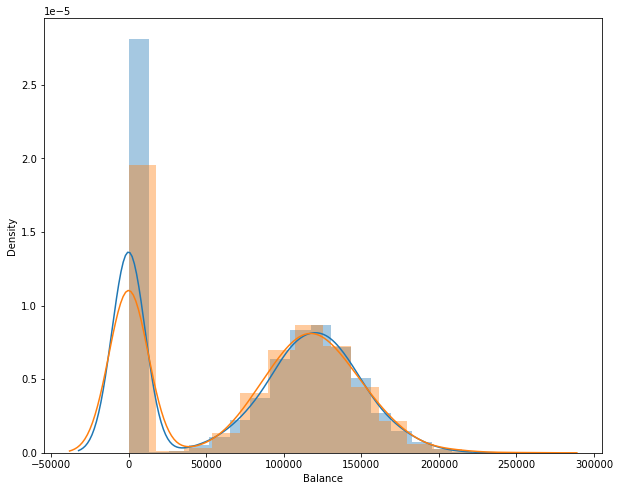

In [95]:
plt.figure(figsize=(10,8))
sns.distplot(yes_CrCard)
sns.distplot(no_CrCard)

#### `Balance and HasCrCard are not related`

### vs IsActiveMember

In [96]:
yes_active = data.loc[data["IsActiveMember"]==1,'Balance']
no_active = data.loc[data["IsActiveMember"]==0,'Balance']
ttest_results = ttest_ind(yes_active,no_active)
ttest_results

Ttest_indResult(statistic=-0.6294041482991839, pvalue=0.529099525762004)

<AxesSubplot:xlabel='IsActiveMember', ylabel='Balance'>

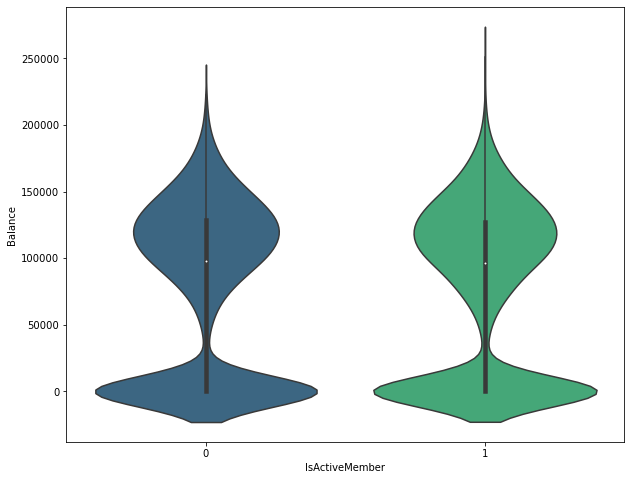

In [97]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Balance',x='IsActiveMember',data=data,palette='viridis')

#### `Balance and IsActiveMember are not related`

### vs Exited

In [98]:
yes_churn = data.loc[data["Exited"]==1,'Balance']
no_churn = data.loc[data["Exited"]==0,'Balance']
ttest_results = ttest_ind(yes_churn,no_churn)
ttest_results

Ttest_indResult(statistic=11.401465863299103, pvalue=6.410356129284965e-30)

<AxesSubplot:xlabel='Gender', ylabel='Balance'>

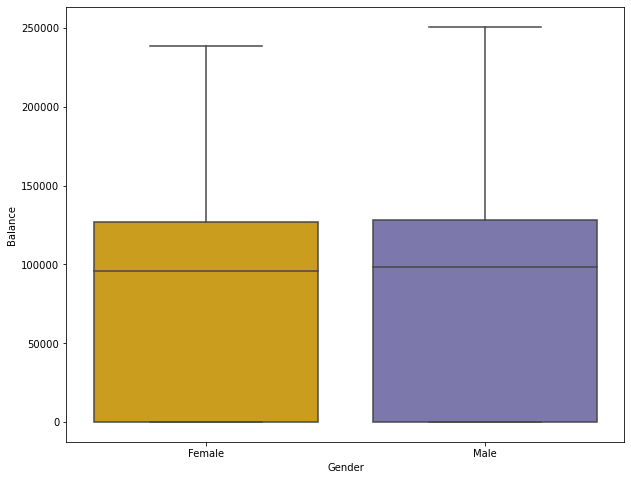

In [99]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Balance',x='Gender',data=data,palette='Dark2_r')

#### `Balance and Exited are related`

### vs NoOfProducts

In [100]:
grp_1 = data.loc[data["NumOfProducts"]==1,'Balance']
grp_2 = data.loc[data["NumOfProducts"]==2,'Balance']
grp_3 = data.loc[data["NumOfProducts"]==3,'Balance']
grp_4 = data.loc[data["NumOfProducts"]==4,'Balance']
f_oneway(grp_1,grp_2,grp_3,grp_4)

F_onewayResult(statistic=500.7052901983727, pvalue=3.0286409342869416e-302)

<AxesSubplot:xlabel='NumOfProducts', ylabel='Balance'>

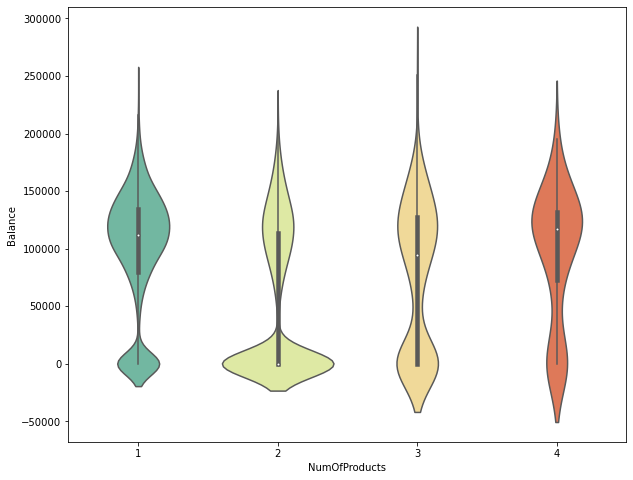

In [101]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Balance',x='NumOfProducts',data=data,palette='Spectral_r')

#### `Balance and NoOfProducts are related`

### vs Geography

In [102]:
grp_france = data.loc[data["Geography"]=='France','Balance']
grp_germany = data.loc[data["Geography"]=='Germany','Balance']
grp_spain = data.loc[data["Geography"]=='Spain','Balance']
f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=918.7589558266509, pvalue=0.0)

<AxesSubplot:xlabel='Geography', ylabel='Balance'>

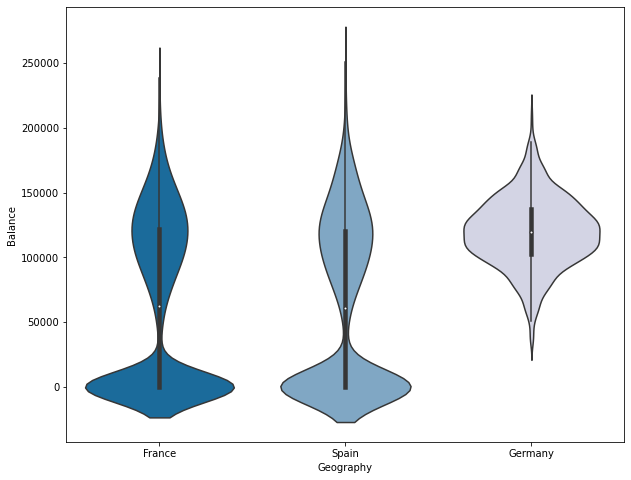

In [103]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Balance',x='Geography',data=data,palette='PuBu_r')

#### `Balance and Geography are related`

### vs Tenure

In [104]:
grp_0 = data.loc[data["Tenure"]==0,'Balance']
grp_1 = data.loc[data["Tenure"]==1,'Balance']
grp_2 = data.loc[data["Tenure"]==2,'Balance']
grp_3 = data.loc[data["Tenure"]==3,'Balance']
grp_4 = data.loc[data["Tenure"]==4,'Balance']
grp_5 = data.loc[data["Tenure"]==5,'Balance']
grp_6 = data.loc[data["Tenure"]==6,'Balance']
grp_7 = data.loc[data["Tenure"]==7,'Balance']
grp_8 = data.loc[data["Tenure"]==8,'Balance']
grp_9 = data.loc[data["Tenure"]==9,'Balance']
grp_10 = data.loc[data["Tenure"]==10,'Balance']
grp_11 = data.loc[data["Tenure"]==11,'Balance']

In [105]:
from scipy.stats import f_oneway

f_oneway(grp_0,grp_1,grp_2,grp_3,grp_4,grp_5,grp_6,grp_7,grp_8,grp_9,grp_10)

F_onewayResult(statistic=0.879743561741154, pvalue=0.5514648257244924)

<AxesSubplot:xlabel='Tenure', ylabel='Balance'>

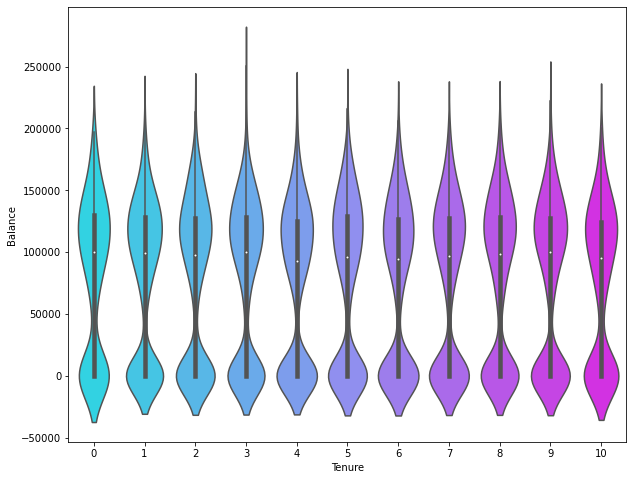

In [106]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Balance',x='Tenure',data=data,palette='cool')

#### `Balance and Tenure are not related`

---

## `Age`

---

### vs Gender

In [107]:
grp_female = data.loc[data["Gender"]=='Female','Age']
grp_male = data.loc[data["Gender"]=='Male','Age']
ttest_results = ttest_ind(grp_female,grp_male)
ttest_results

Ttest_indResult(statistic=3.0985084109015255, pvalue=0.0019506106620073185)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

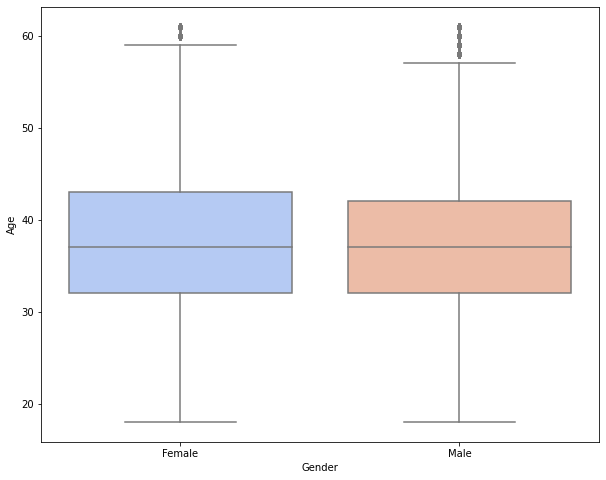

In [108]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Age',x='Gender',data=data,palette='coolwarm')

#### `Age and Gender are related`

### vs HasCrCard

In [109]:
yes_CrCard = data.loc[data["HasCrCard"]==1,'Age']
no_CrCard = data.loc[data["HasCrCard"]==0,'Age']
ttest_results = ttest_ind(yes_CrCard,no_CrCard)
ttest_results

Ttest_indResult(statistic=-1.2640956932003382, pvalue=0.20622646672373873)

<AxesSubplot:xlabel='Age', ylabel='Density'>

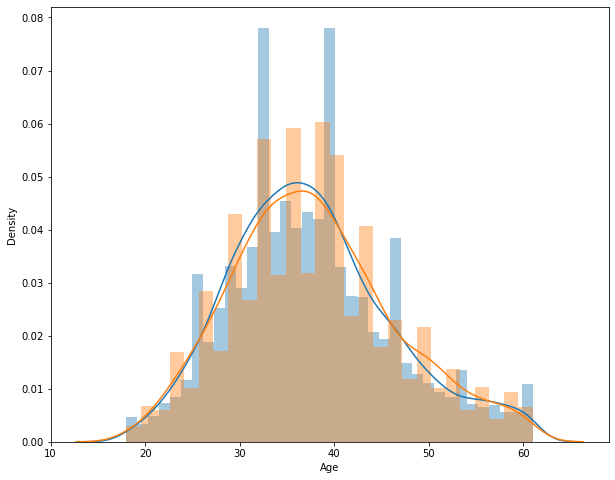

In [110]:
plt.figure(figsize=(10,8))
sns.distplot(yes_CrCard)
sns.distplot(no_CrCard)

#### `Age and HasCrCard are not related`

### vs IsActiveMember

In [111]:
yes_active = data.loc[data["IsActiveMember"]==1,'Age']
no_active = data.loc[data["IsActiveMember"]==0,'Age']
ttest_results = ttest_ind(yes_active,no_active)
ttest_results

Ttest_indResult(statistic=1.2341338974339924, pvalue=0.21718331614333217)

<AxesSubplot:xlabel='IsActiveMember', ylabel='Age'>

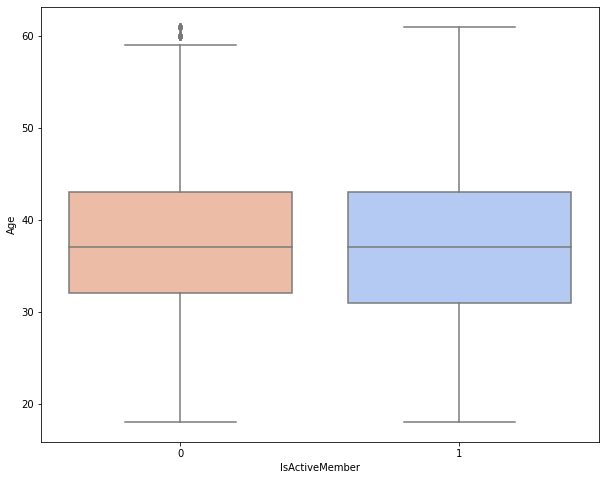

In [112]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Age',x='IsActiveMember',data=data,palette='coolwarm_r')

#### `Age and IsActiveMember are related`

### vs Exited

In [113]:
yes_churn = data.loc[data["Exited"]==1,'Age']
no_churn = data.loc[data["Exited"]==0,'Age']
ttest_results = ttest_ind(yes_churn,no_churn)
ttest_results

Ttest_indResult(statistic=37.7512621578425, pvalue=7.369563025670061e-291)

<AxesSubplot:xlabel='Exited', ylabel='Age'>

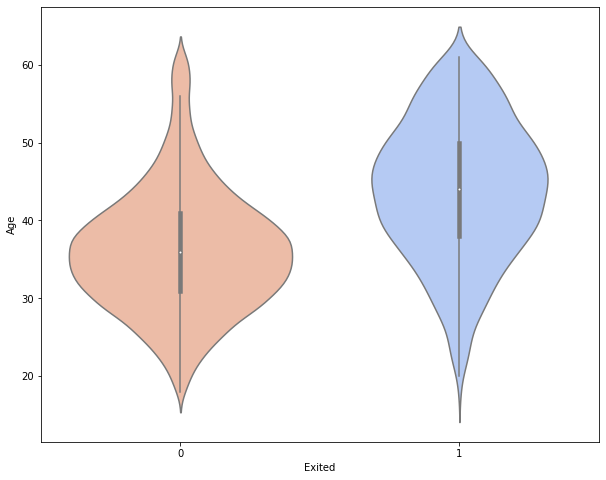

In [114]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Age',x='Exited',data=data,palette='coolwarm_r')

#### `Age and Exited are related`

### vs NoOfProducts

In [115]:
grp_1 = data.loc[data["NumOfProducts"]==1,'Age']
grp_2 = data.loc[data["NumOfProducts"]==2,'Age']
grp_3 = data.loc[data["NumOfProducts"]==3,'Age']
grp_4 = data.loc[data["NumOfProducts"]==4,'Age']
f_oneway(grp_1,grp_2,grp_3,grp_4)

F_onewayResult(statistic=73.41114445488793, pvalue=6.157168030507121e-47)

<AxesSubplot:xlabel='NumOfProducts', ylabel='Age'>

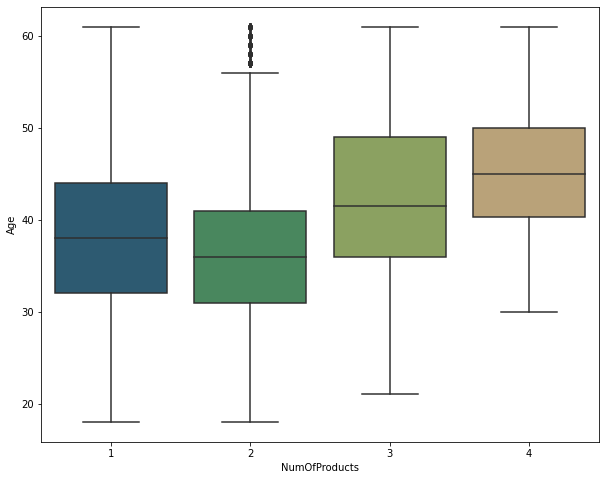

In [116]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Age',x='NumOfProducts',data=data,palette='gist_earth')

#### `Age and NumOfProducts are related`

### vs Geography

In [117]:
grp_france = data.loc[data["Geography"]=='France','Age']
grp_germany = data.loc[data["Geography"]=='Germany','Age']
grp_spain = data.loc[data["Geography"]=='Spain','Age']
f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=20.935425084855652, pvalue=8.466280174969233e-10)

<AxesSubplot:xlabel='Geography', ylabel='Age'>

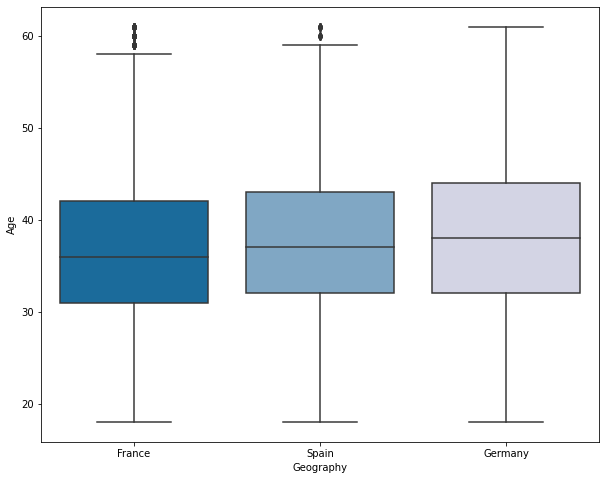

In [118]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Age',x='Geography',data=data,palette='PuBu_r')

#### `Age and Geography are related`

### vs Tenure

In [119]:
grp_0 = data.loc[data["Tenure"]==0,'Age']
grp_1 = data.loc[data["Tenure"]==1,'Age']
grp_2 = data.loc[data["Tenure"]==2,'Age']
grp_3 = data.loc[data["Tenure"]==3,'Age']
grp_4 = data.loc[data["Tenure"]==4,'Age']
grp_5 = data.loc[data["Tenure"]==5,'Age']
grp_6 = data.loc[data["Tenure"]==6,'Age']
grp_7 = data.loc[data["Tenure"]==7,'Age']
grp_8 = data.loc[data["Tenure"]==8,'Age']
grp_9 = data.loc[data["Tenure"]==9,'Age']
grp_10 = data.loc[data["Tenure"]==10,'Age']
grp_11 = data.loc[data["Tenure"]==11,'Age']

f_oneway(grp_0,grp_1,grp_2,grp_3,grp_4,grp_5,grp_6,grp_7,grp_8,grp_9,grp_10)

F_onewayResult(statistic=0.8860880829994964, pvalue=0.5453936544872005)

<AxesSubplot:xlabel='Tenure', ylabel='Age'>

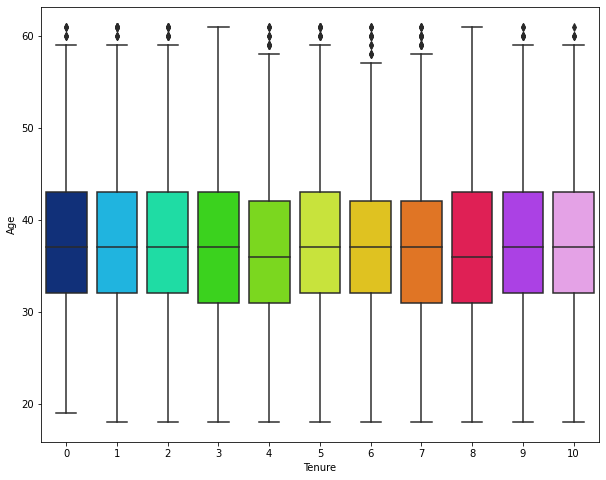

In [120]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Age',x='Tenure',data=data,palette='gist_ncar')

#### `Age and Tenure are not related`

## `CreditScore`

### vs Gender

In [121]:
grp_female = data.loc[data["Gender"]=='Female','CreditScore']
grp_male = data.loc[data["Gender"]=='Male','CreditScore']
ttest_results = ttest_ind(grp_female,grp_male)
ttest_results

Ttest_indResult(statistic=0.42064111099606916, pvalue=0.6740266130345689)

<AxesSubplot:xlabel='Gender', ylabel='CreditScore'>

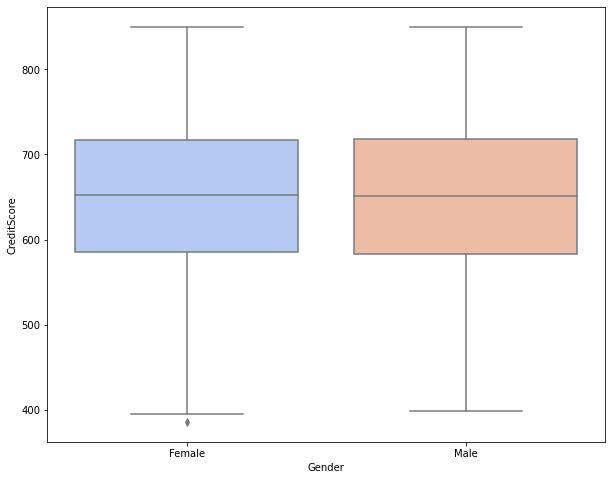

In [122]:
plt.figure(figsize=(10,8))
sns.boxplot(y='CreditScore',x='Gender',data=data,palette='coolwarm')

#### `CredirScore and Gender are not related`

### vs HasCrCard

In [123]:
yes_CrCard = data.loc[data["HasCrCard"]==1,'CreditScore']
no_CrCard = data.loc[data["HasCrCard"]==0,'CreditScore']
ttest_results = ttest_ind(yes_CrCard,no_CrCard)
ttest_results

Ttest_indResult(statistic=-0.24038200767944196, pvalue=0.8100392734893334)

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

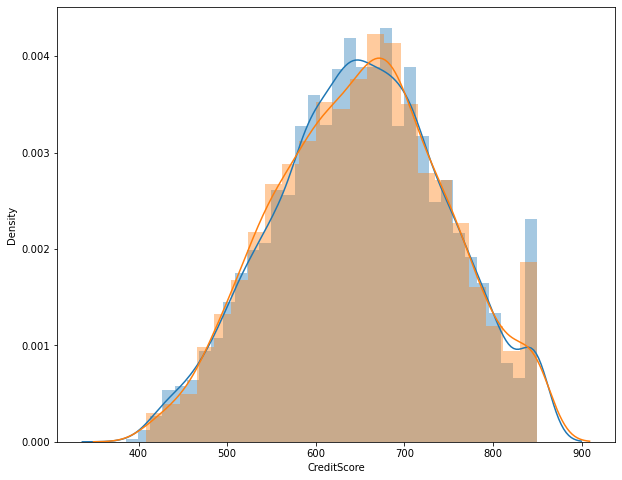

In [124]:
plt.figure(figsize=(10,8))
sns.distplot(yes_CrCard)
sns.distplot(no_CrCard)

#### `CreditScore and HasCrCard are not related`

### vs IsActiveMember

In [125]:
yes_active = data.loc[data["IsActiveMember"]==1,'CreditScore']
no_active = data.loc[data["IsActiveMember"]==0,'CreditScore']
ttest_results = ttest_ind(yes_active,no_active)
ttest_results

Ttest_indResult(statistic=1.9559814660906525, pvalue=0.05049638462428706)

<AxesSubplot:xlabel='IsActiveMember', ylabel='CreditScore'>

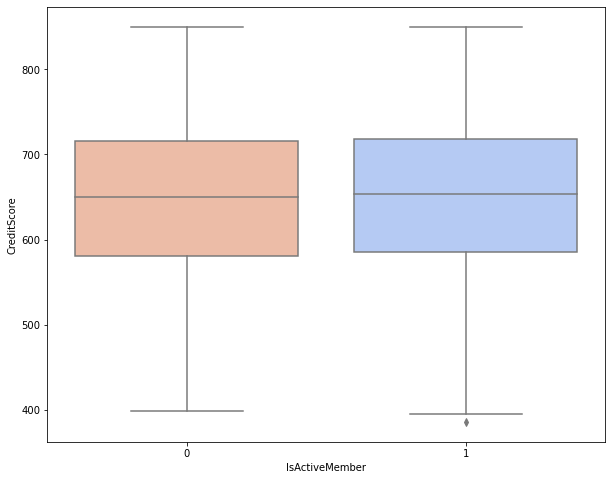

In [126]:
plt.figure(figsize=(10,8))
sns.boxplot(y='CreditScore',x='IsActiveMember',data=data,palette='coolwarm_r')

#### `CreditScore and IsActiveMember are not related`

### vs Exited

In [127]:
yes_churn = data.loc[data["Exited"]==1,'CreditScore']
no_churn = data.loc[data["Exited"]==0,'CreditScore']
ttest_results = ttest_ind(yes_churn,no_churn)
ttest_results

Ttest_indResult(statistic=-1.4829260170560554, pvalue=0.1381269938343482)

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

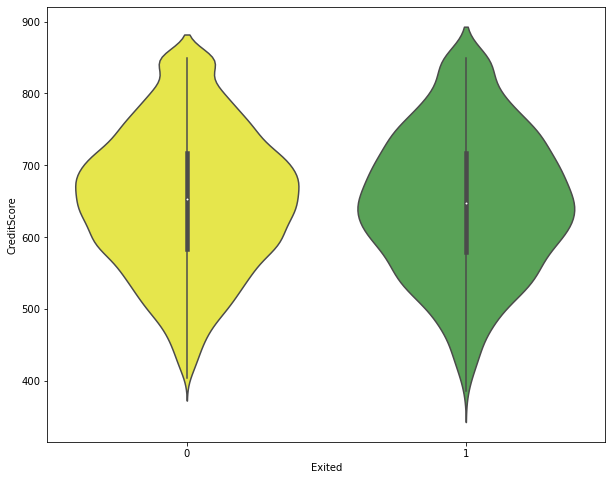

In [128]:
plt.figure(figsize=(10,8))
sns.violinplot(y='CreditScore',x='Exited',data=data,palette='Set1_r')

#### `CreditScore and Exited are not related`

### NumOfProducts

In [129]:
grp_1 = data.loc[data["NumOfProducts"]==1,'CreditScore']
grp_2 = data.loc[data["NumOfProducts"]==2,'CreditScore']
grp_3 = data.loc[data["NumOfProducts"]==3,'CreditScore']
grp_4 = data.loc[data["NumOfProducts"]==4,'CreditScore']
f_oneway(grp_1,grp_2,grp_3,grp_4)

F_onewayResult(statistic=0.5609709512891957, pvalue=0.6407527142069755)

<AxesSubplot:xlabel='NumOfProducts', ylabel='CreditScore'>

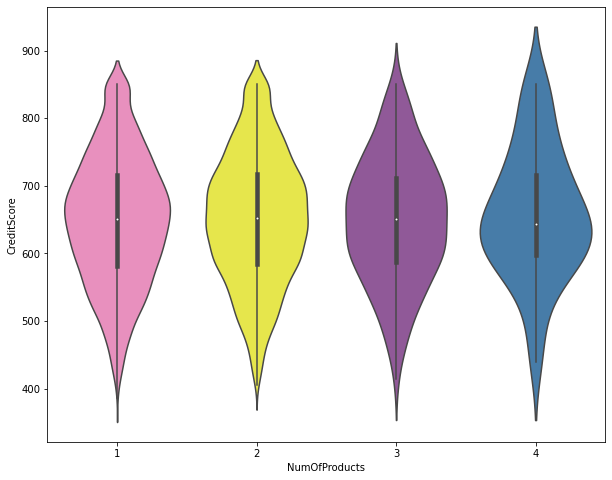

In [130]:
plt.figure(figsize=(10,8))
sns.violinplot(y='CreditScore',x='NumOfProducts',data=data,palette='Set1_r')

#### `CreditScore and NumOfProducts are not related`

### vs Geography

In [131]:
grp_france = data.loc[data["Geography"]=='France','CreditScore']
grp_germany = data.loc[data["Geography"]=='Germany','CreditScore']
grp_spain = data.loc[data["Geography"]=='Spain','CreditScore']
f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=0.7466984502285386, pvalue=0.4739562812391336)

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

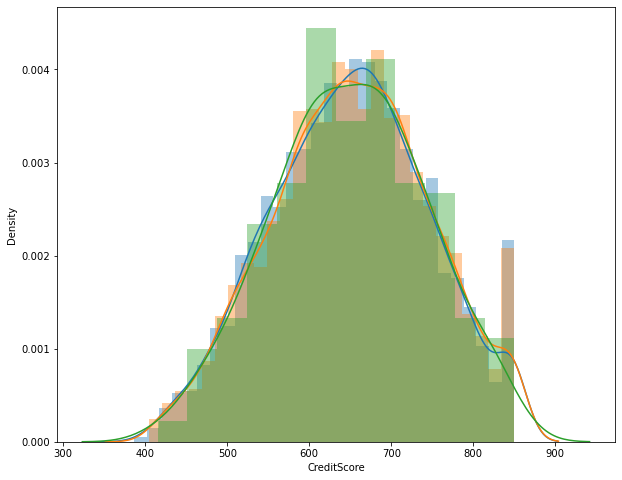

In [132]:
plt.figure(figsize=(10,8))
sns.distplot(grp_1)
sns.distplot(grp_2)
sns.distplot(grp_3)

#### `CreditScore and Geography are not related`

### vs Tenure

In [133]:
grp_0 = data.loc[data["Tenure"]==0,'CreditScore']
grp_1 = data.loc[data["Tenure"]==1,'CreditScore']
grp_2 = data.loc[data["Tenure"]==2,'CreditScore']
grp_3 = data.loc[data["Tenure"]==3,'CreditScore']
grp_4 = data.loc[data["Tenure"]==4,'CreditScore']
grp_5 = data.loc[data["Tenure"]==5,'CreditScore']
grp_6 = data.loc[data["Tenure"]==6,'CreditScore']
grp_7 = data.loc[data["Tenure"]==7,'CreditScore']
grp_8 = data.loc[data["Tenure"]==8,'CreditScore']
grp_9 = data.loc[data["Tenure"]==9,'CreditScore']
grp_10 = data.loc[data["Tenure"]==10,'CreditScore']
grp_11 = data.loc[data["Tenure"]==11,'CreditScore']

f_oneway(grp_0,grp_1,grp_2,grp_3,grp_4,grp_5,grp_6,grp_7,grp_8,grp_9,grp_10)

F_onewayResult(statistic=0.44684510389989107, pvalue=0.9237045960837542)

<AxesSubplot:xlabel='Tenure', ylabel='CreditScore'>

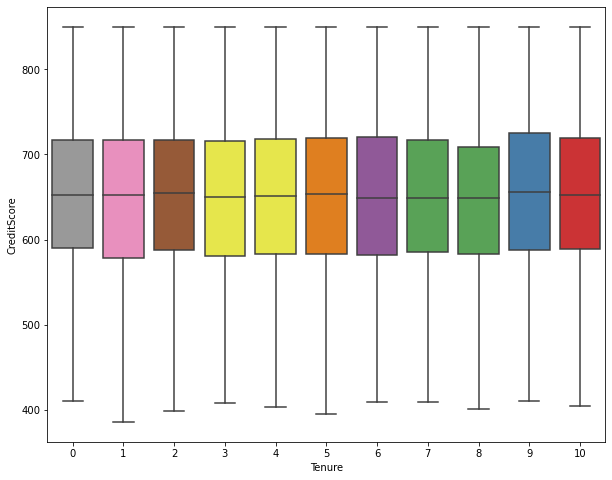

In [134]:
plt.figure(figsize=(10,8))
sns.boxplot(y='CreditScore',x='Tenure',data=data,palette='Set1_r')

#### `CreditScore and Tenure are not related`

-----

## `Conclusion of Bivariate Analysis #####################`:
### `Cat vs Cat`:
#### `Are Related`
> - `Geography and Gender are related`
> - `Geography and Exited are related`
#### `Are not Related`
> - ` Gender and HasCrCard are not related`
> - `Gender and IsActive Member are not related`
---
### `Num vs Num`:
#### `Are Related`
> - `Age and Balance are related`
#### `Are not Related`
> - `Age and CreditScore are not related`
> - `EstimatedSalary and Balance are not related`
> - `EstimatedSalary and CreditScore are not related`
> - `Balance and CreditScore are not related`

---
### `Cat vs Num`:
#### `Are Related`
> - `Balance and Exited are related`
> - `Balance and NoOfProducts are related`
> - `Balance and Geography are related`
> - `Balance and Tenure are related`
> - `Age and Gender are related`
> - `Age and IsActiveMember are related`
> - `Age and Exited are related`
> - `Age and NumOfProducts are related`
> - `Age and Geography are related`


#### `Are not Related`
> - `EstimatedSalary and Gender are not related`
> - `EstimatedSalary and HasCrCard are not related`
> - `EstimatedSalary and IsActiveMember are not related`
> - `EstimatedSalary and Exited are not related`
> - `EstimatedSalary and No of Products are not related`
> - `EstimatedSalary and Geography are not related`
> - `EstimatedSalary and Tenure are not related`
> - `Balance and Gender are not related`
> - `Balance and HasCrCard are not related`
> - `Balance and IsActiveMember are not related`
> - `Age and HasCrCard are not related`
> - `Age and Tenure are not related`
> - `CreditScore and Gender are not related`
> - `CreditScore and HasCrCard are not related`
> - `CreditScore and IsActiveMember are not related`
> - `CreditScore and Exited are not related`
> - `CreditScore and NumOfProducts are not related`
> - `CreditScore and Geography are not related`
> - `CreditScore and Tenure are not related`

-------

## `Bivariate Analysis regarding Target variable i.e Exited ---------------------`


## `Variables`
### Categorical:
> - Geography 
> - Gender
> - HasCrCard
> - IsActiveMember
> - Exited
> - Tenure
> - No Of Products


### Numerical:
> - CreditScore
> - Age 
> - Balance
> - EstimatedSalary


### CreditScore vs Exited

In [135]:
grp_retained = data.loc[data["Exited"]==0,'CreditScore']
grp_closed = data.loc[data["Exited"]==1,'CreditScore']

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

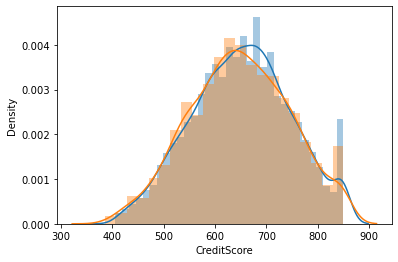

In [136]:
sns.distplot(grp_retained)
sns.distplot(grp_closed)

In [137]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_retained,grp_closed)

In [138]:
ttest_results

Ttest_indResult(statistic=1.4829260170560554, pvalue=0.1381269938343482)

#### `CreditScore and exited are related`

### Geography vs Exited

In [139]:
two_way_frquency=pd.crosstab(data['Geography'],data['Exited'])
two_way_frquency

Exited,0,1
Geography,,
France,4033,769
Germany,1635,772
Spain,1978,386


In [140]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [141]:
p_value

1.0652251938333508e-62

#### `Geography and exited are related`

### Gender vs Exited

In [142]:
two_way_frquency=pd.crosstab(data['Gender'],data['Exited'])
two_way_frquency

Exited,0,1
Gender,,
Female,3267,1077
Male,4379,850


In [143]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [144]:
p_value

4.367663108757807e-25

#### `Gender and exited are related`

### Age vs Exited

In [145]:
grp_retained = data.loc[data["Exited"]==0,'Age']
grp_closed = data.loc[data["Exited"]==1,'Age']

<AxesSubplot:xlabel='Age', ylabel='Density'>

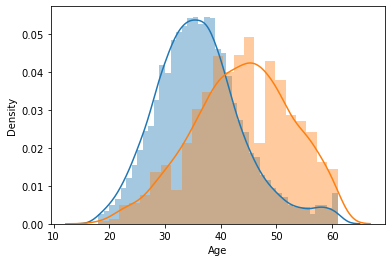

In [146]:
sns.distplot(grp_retained)
sns.distplot(grp_closed)

In [147]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_retained,grp_closed)

In [148]:
ttest_results

Ttest_indResult(statistic=-37.7512621578425, pvalue=7.369563025670061e-291)

#### `Age and exited are related`

### Tenure vs Exited 

In [149]:
two_way_frquency=pd.crosstab(data['Tenure'],data['Exited'])
two_way_frquency

Exited,0,1
Tenure,,
0,302,90
1,770,216
2,813,194
3,764,198
4,759,193
5,768,198
6,739,186
7,824,168
8,806,186


In [150]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [151]:
p_value

0.2063090853401231

#### `Tenure and exited are related`

### HasCrCard vs Exited 

In [152]:
two_way_frquency=pd.crosstab(data['HasCrCard'],data['Exited'])
two_way_frquency

Exited,0,1
HasCrCard,,
0,2238,580
1,5408,1347


In [153]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [154]:
p_value

0.49327429718249693

#### `HasCrCard and exited are not related`

### IsAciveMember vs Exited

In [155]:
two_way_frquency=pd.crosstab(data['IsActiveMember'],data['Exited'])
two_way_frquency

Exited,0,1
IsActiveMember,,
0,3532,1230
1,4114,697


In [156]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [157]:
p_value

2.152794783592081e-43

#### `IsActiveMember and exited are related`

### NoOfProducts vs Exited

In [158]:
two_way_frquency=pd.crosstab(data['NumOfProducts'],data['Exited'])
two_way_frquency

Exited,0,1
NumOfProducts,,
1,3517,1337
2,4087,326
3,42,206
4,0,58


In [159]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [160]:
p_value

0.0

#### `NoOfProducts and exited are related`

### Balance vs Exited

In [161]:
grp_retained = data.loc[data["Exited"]==0,'Balance']
grp_closed = data.loc[data["Exited"]==1,'Balance']

In [162]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_retained,grp_closed)

In [163]:
ttest_results

Ttest_indResult(statistic=-11.401465863299103, pvalue=6.410356129284965e-30)

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

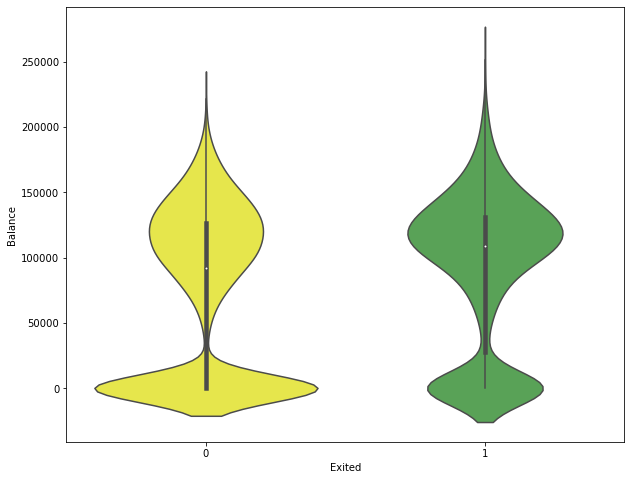

In [164]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Balance',x='Exited',data=data,palette='Set1_r')

#### `Balance and exited are related`

### EstimatedSalary vs Exited

In [165]:
grp_retained = data.loc[data["Exited"]==0,'EstimatedSalary']
grp_closed = data.loc[data["Exited"]==1,'EstimatedSalary']

In [166]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_retained,grp_closed)

In [167]:
ttest_results

Ttest_indResult(statistic=-0.9891707378122429, pvalue=0.3226046185199479)

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

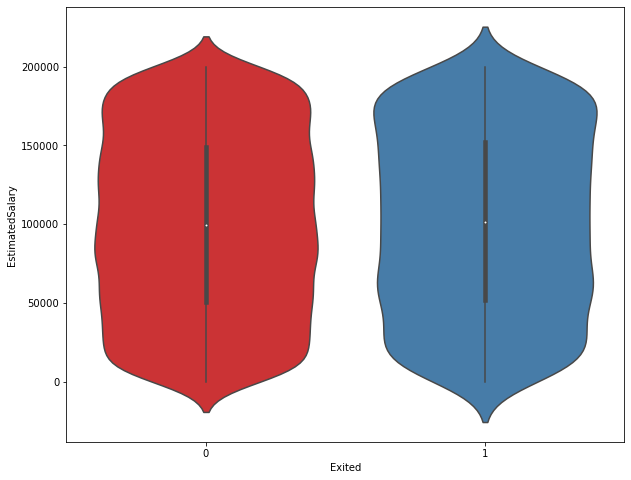

In [168]:
plt.figure(figsize=(10,8))
sns.violinplot(y='EstimatedSalary',x='Exited',data=data,palette='Set1')

#### `EstimatedSalary and exited are not related`

### `Gender, Geography vs Exited ( 2 way Anova )`

In [169]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### perform two-way ANOVA
model = ols('Exited ~ Gender + Geography + Gender:Geography', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Gender,15.853559,1.0,102.672133,5.226414e-24
Geography,44.443634,2.0,143.914774,2.632471e-62
Gender:Geography,0.129719,2.0,0.420048,6.570275e-01
Residual,1477.236266,9567.0,NaN,NaN


 `Since the p-values for Gender and Geography are both less than .05, this means that both factors have a statistically significant effect on Exited`


--------------------
--------------------
--------------------
--------------------

## `Conclusion regarding target variable -----------------------------`

### `Are related`:
> - `CreditScore and exited are related`
> - `Geography and exited are related`
> - `Gender and exited are related`
> - `Age and exited are related`
> - `Tenure and exited are related`
> - `IsActiveMember and exited are related`
> - `NoOfProducts and exited are related`
> - `Balance and exited are related`


### `Are not related`:
> - `HasCrCard and exited are not related`
> - `EstimatedSalary and exited are not related`

--------------------
--------------------
--------------------
--------------------


## `Conclusion of Bivariate Analysis between all variables #########`:
### `Cat vs Cat`:
#### `Are Related`
> - `Geography and Gender are related`
> - `Geography and Exited are related`
#### `Are not Related`
> - ` Gender and HasCrCard are not related`
> - `Gender and IsActive Member are not related`
---
### `Num vs Num`:
#### `Are Related`
> - `Age and Balance are related`
#### `Are not Related`
> - `Age and CreditScore are not related`
> - `EstimatedSalary and Balance are not related`
> - `EstimatedSalary and CreditScore are not related`
> - `Balance and CreditScore are not related`

---
### `Cat vs Num`:
#### `Are Related`
> - `Balance and Exited are related`
> - `Balance and NoOfProducts are related`
> - `Balance and Geography are related`
> - `Balance and Tenure are related`
> - `Age and Gender are related`
> - `Age and IsActiveMember are related`
> - `Age and Exited are related`
> - `Age and NumOfProducts are related`
> - `Age and Geography are related`


#### `Are not Related`
> - `EstimatedSalary and Gender are not related`
> - `EstimatedSalary and HasCrCard are not related`
> - `EstimatedSalary and IsActiveMember are not related`
> - `EstimatedSalary and Exited are not related`
> - `EstimatedSalary and No of Products are not related`
> - `EstimatedSalary and Geography are not related`
> - `EstimatedSalary and Tenure are not related`
> - `Balance and Gender are not related`
> - `Balance and HasCrCard are not related`
> - `Balance and IsActiveMember are not related`
> - `Age and HasCrCard are not related`
> - `Age and Tenure are not related`
> - `CreditScore and Gender are not related`
> - `CreditScore and HasCrCard are not related`
> - `CreditScore and IsActiveMember are not related`
> - `CreditScore and Exited are not related`
> - `CreditScore and NumOfProducts are not related`
> - `CreditScore and Geography are not related`
> - `CreditScore and Tenure are not related`

## `Feature Selection ------------------------------`

<br />
<br />



- **Based on above analysis `Creditscore, Age, Tenure, Geography, Gender and Balance` are useful features that can be used to predict value for `Exited`**

<br />

- **Removed `IsActiveMember, NoOfProducts` because of Multicollinearity**  

<br />

- **Removed `HascrCard and EstiatedSalary` because they are not related to target variable `Exited`**


### Note:`Milan Sir Review needed before final model building`
<br />
<br />


### Future steps to be followed before model building
- **Label encoding for Gender**
- **One hot encoding for Geography**

## Problem Type: `It's a Classification problem`
<br />
<br />
<br />
<br />


# `End -----------------------------------`